In [ ]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()  # Seleziona il file dal tuo computer

Saving FlightFare.csv to FlightFare.csv


In [ ]:
df=pd.read_csv("FlightFare.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
df.describe()


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


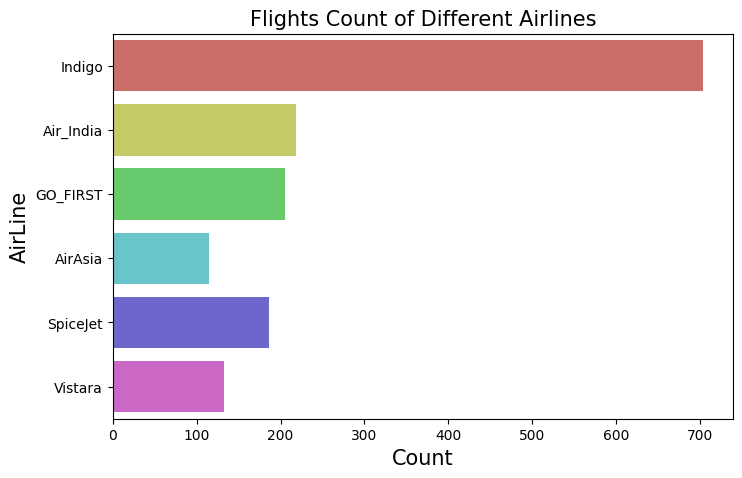

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('AirLine',fontsize=15)
plt.show()

In [ ]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


Most of the Airlines has Economic Class as common




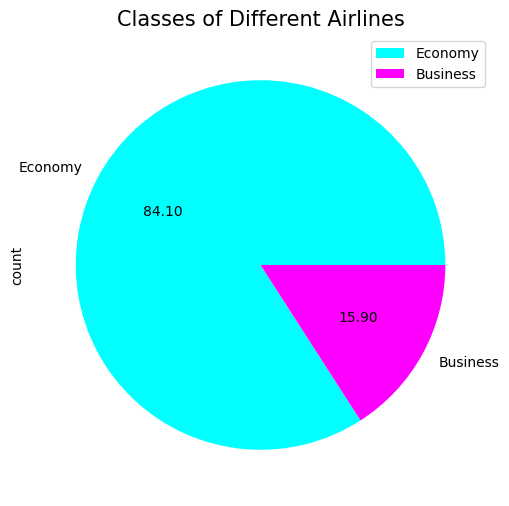

In [ ]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Does price vary with Airlines?


As we can see Vistara has Maximum Price range
Vistara and Air_India Airlines Have Maximum Price when compared to Others
SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

---



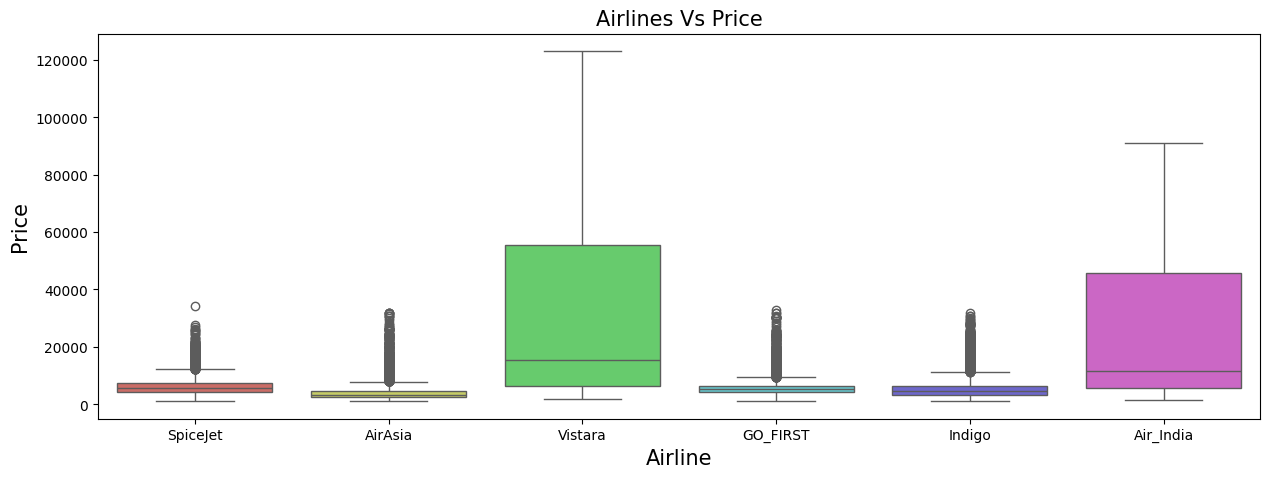

In [ ]:
# Does price vary with Airlines?
# As we can see Vistara has Maximum Price range
# Vistara and Air_India Airlines Have Maximum Price when compared to Others
# SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

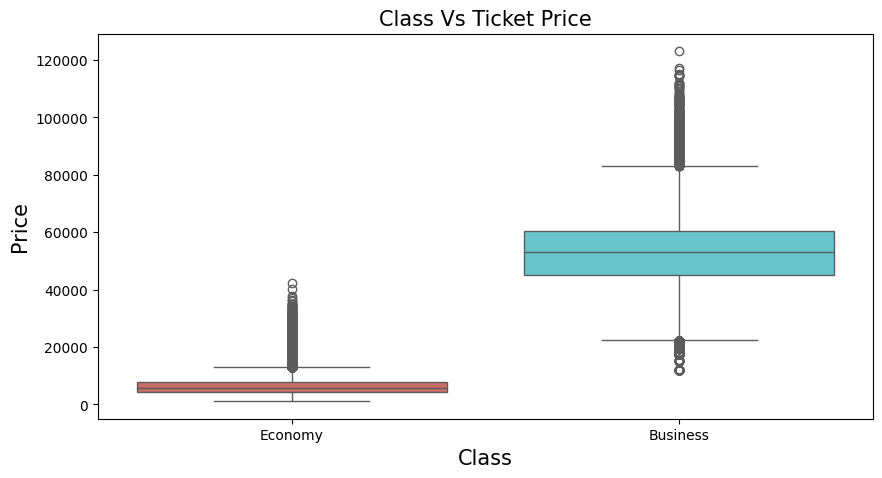

In [ ]:
# How Does the Ticket Price vary between Economy and Business Class?
# Ticket Price is Maximum for Bussiness Class When compared to Economy Class

plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How Does the Ticket Price vary between Economy and Business Class?

Ticket Price is Maximum for Bussiness Class When compared to Economy Class

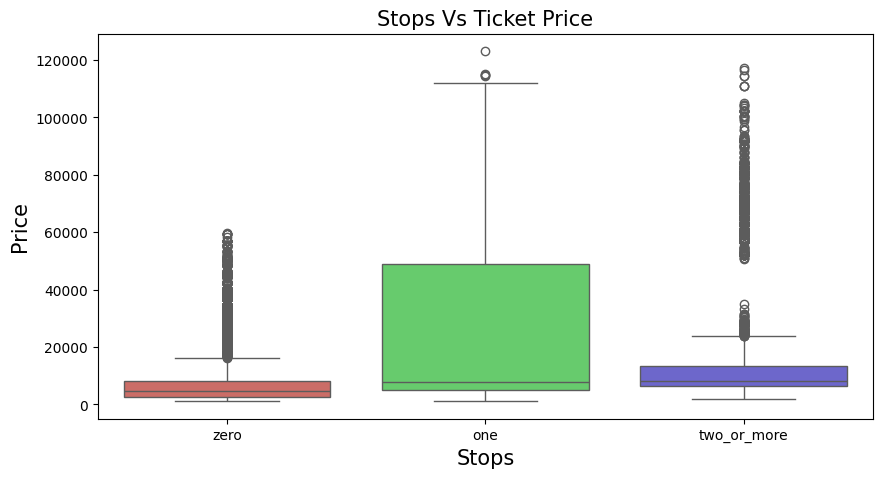

In [ ]:
# How Does the Ticket Price vary with the number of stops of a Flight?
# Flights having one stop has maximum ticket price

plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()



How Does the Ticket Price vary with the number of stops of a Flight?


Flights having one stop has maximum ticket price
```



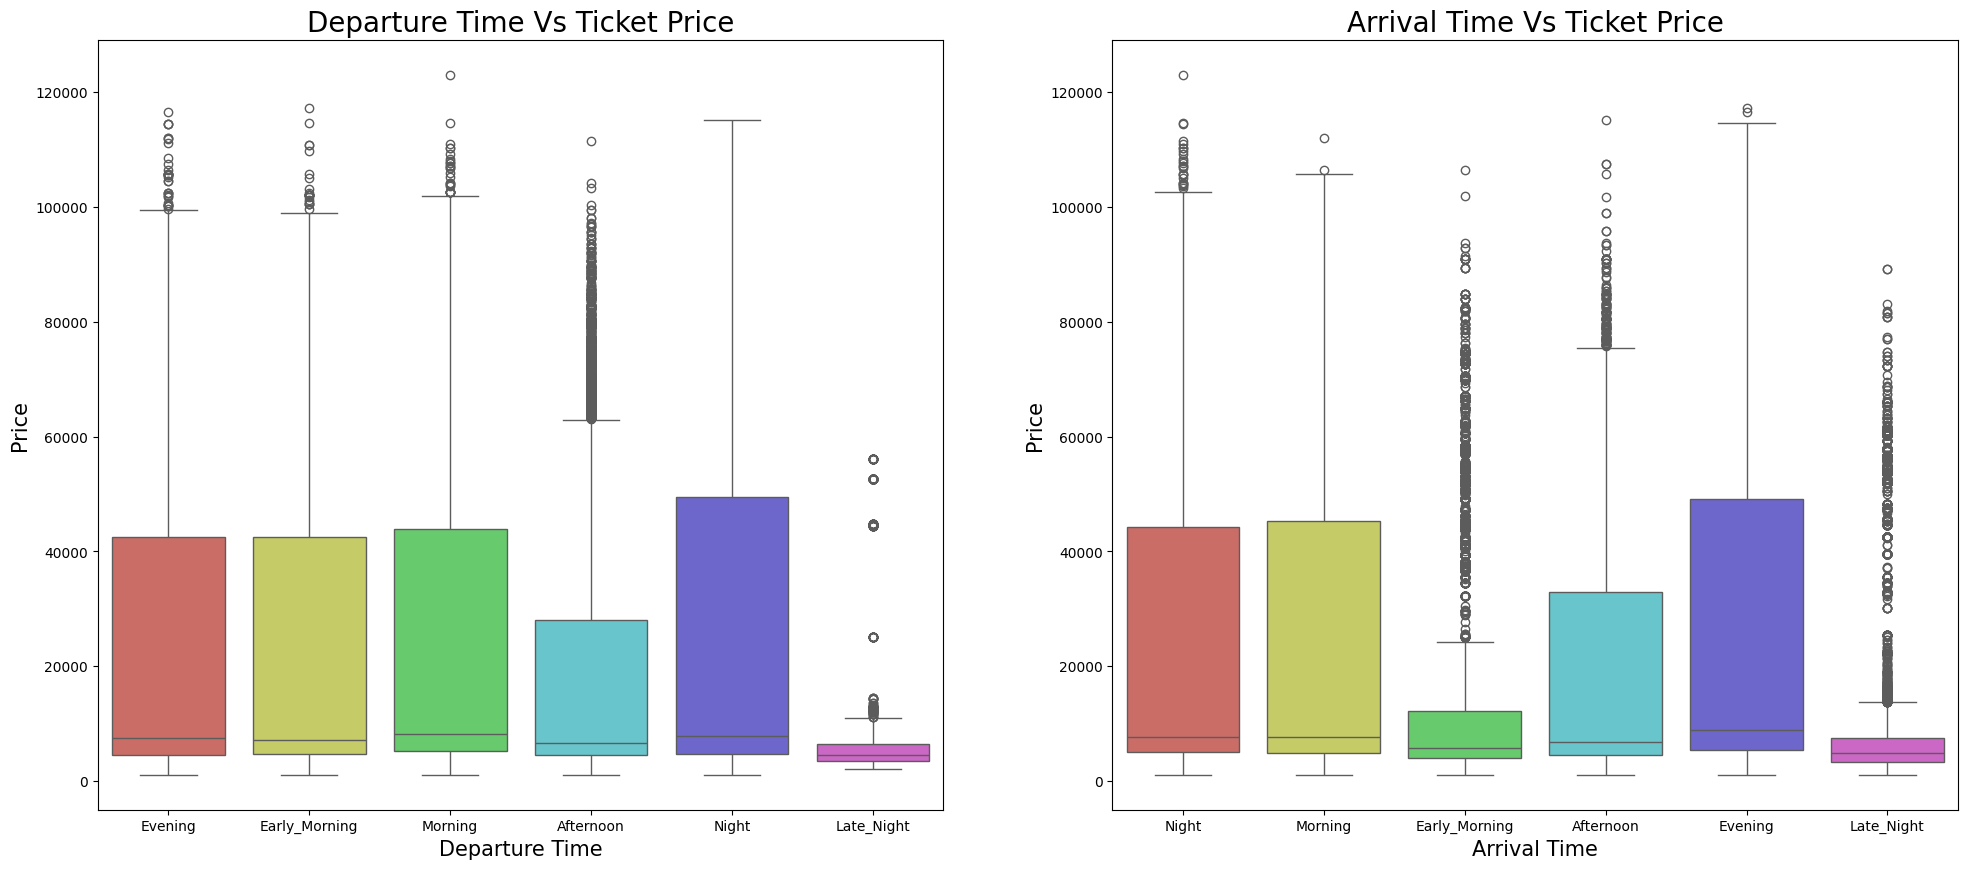

In [ ]:
#How the Ticket Price change based on the Departure Time and Arrival Time?

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df,palette='hls')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the Ticket Price change based on the Departure Time and Arrival Time?
1. Departure Time Vs Ticket Price

Ticket Price is More for the Flights when the Departure Time is at Night
Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
Ticket Price is Low for the Flights Having Departure Time at Late_night
2. Arrival Time Vs Ticket Price
Ticket Price is More for the Flights when the Arrival Time is at Evening
Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

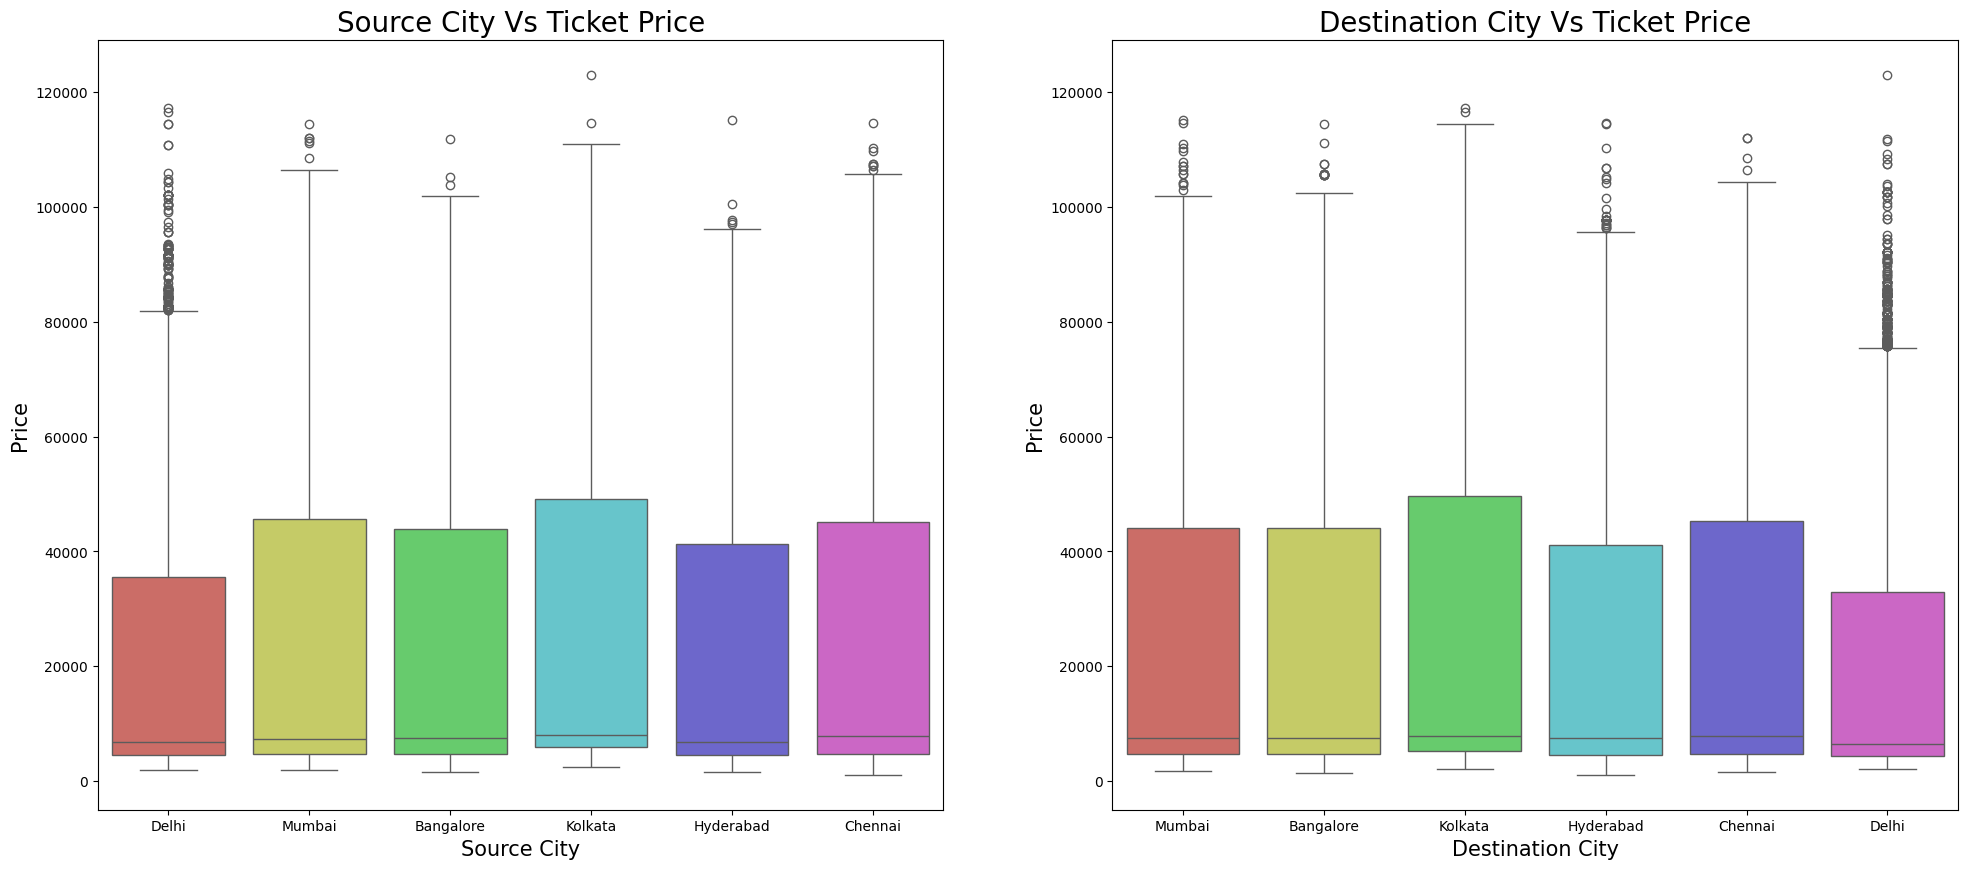

In [ ]:
# How the price changes with change in Source city and Destination city?

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df,palette='hls')
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the price changes with change in Source city and Destination city?
1. Source City Vs Ticket Price

Ticket Price is More for the Flights whose Source City is Kolkata
Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore
Ticket Price is Low for the Flights Having Source City as Delhi
2. Destination City Vs Ticket Price
Ticket Price is More for the Flights whose Destination City is kolkata and Chennai
Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore
Ticket Price is Low for the Flights Having Destination City as Delhi

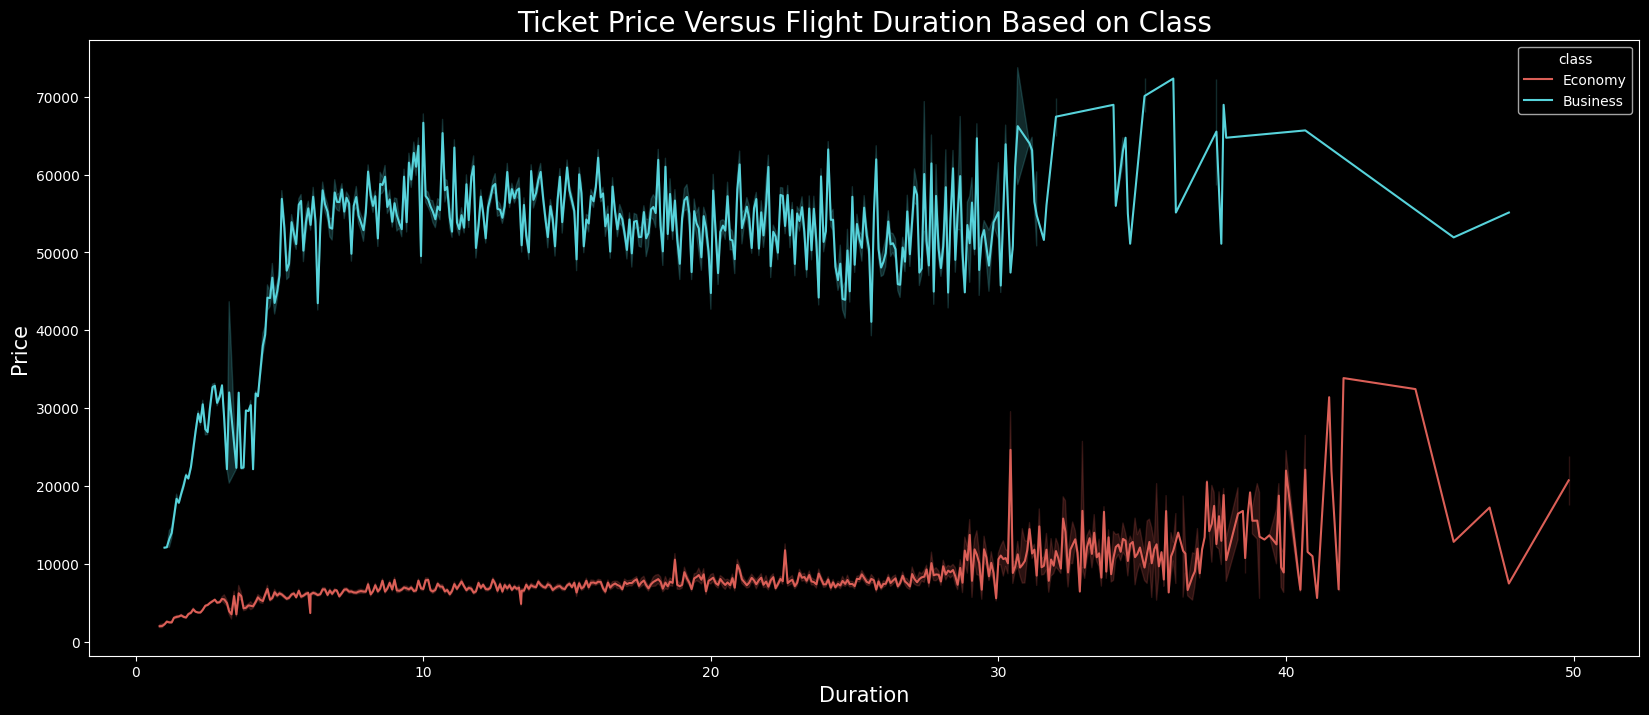

In [ ]:
# How Price Varies with the Flight Duration Based on Class?

# With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

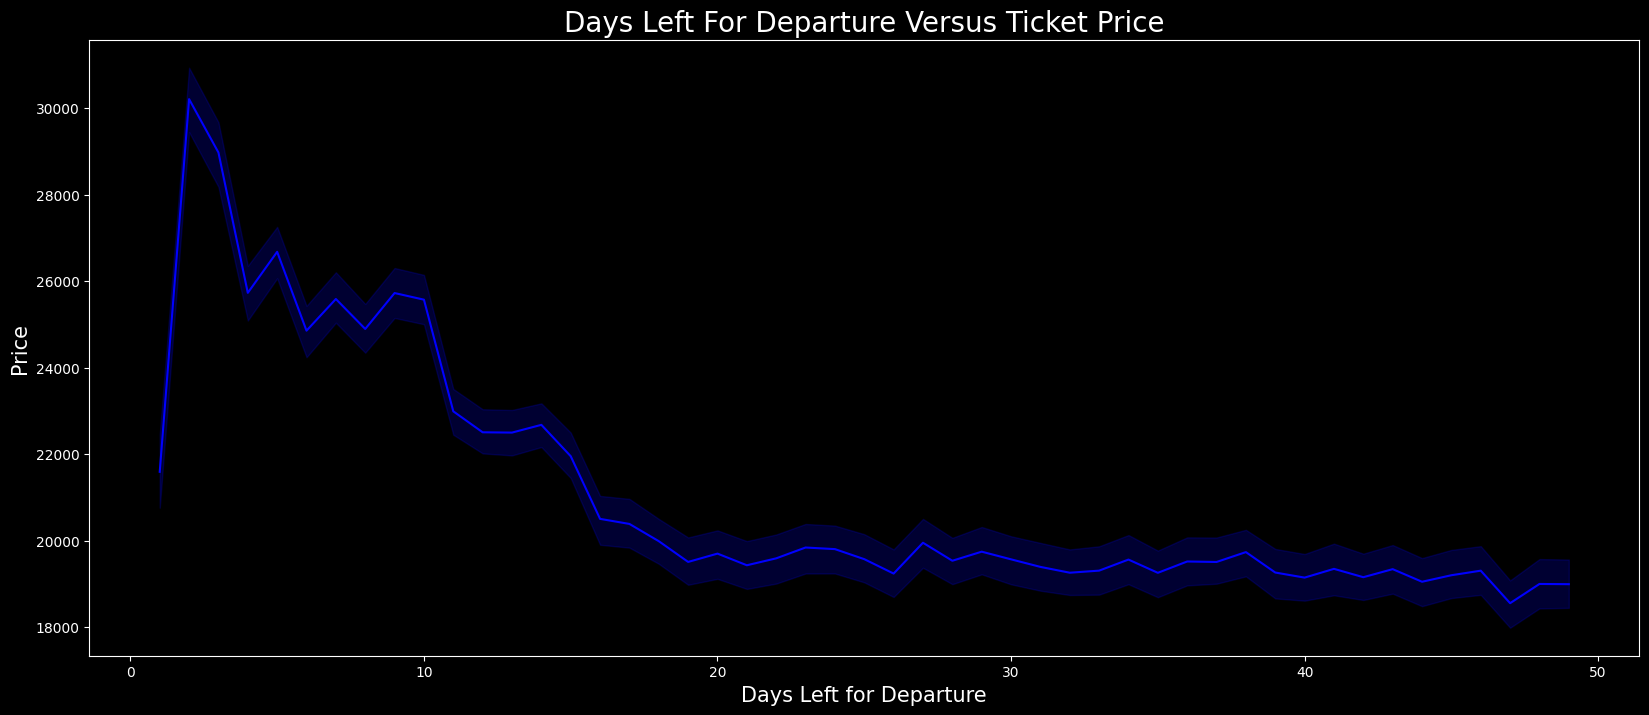

In [ ]:
# How does the price affected on the days left for Departure?

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()



As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines

In [ ]:
from google.colab import files
uploaded = files.upload()  # Seleziona il file dal tuo computer

Saving FlightFare.csv to FlightFare.csv


In [ ]:
flight_fare=pd.read_csv("FlightFare.csv")

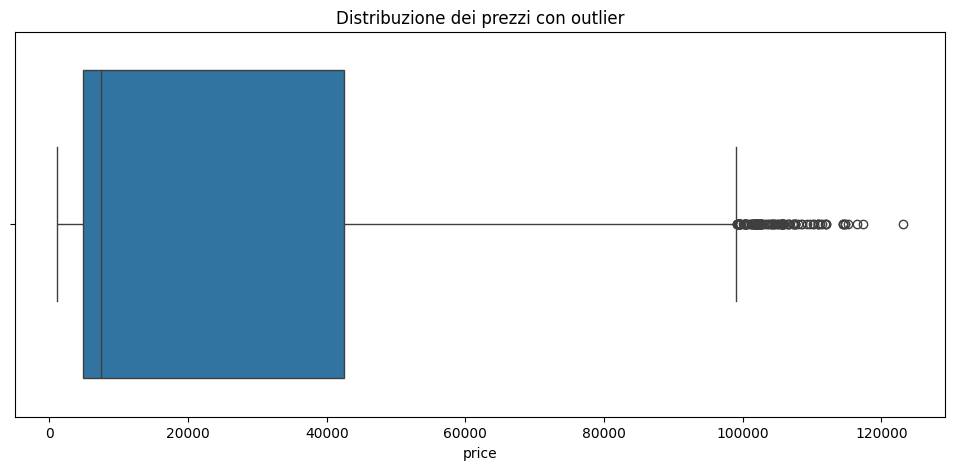

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 🔍 Identificare outlier con boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x=flight_fare["price"])
plt.title("Distribuzione dei prezzi con outlier")
plt.show()

# 📊 Calcolare IQR per la gestione degli outlier
Q1 = flight_fare["price"].quantile(0.25)
Q3 = flight_fare["price"].quantile(0.75)
IQR = Q3 - Q1

# Definire i limiti per considerare un valore un outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 🧐 Contare gli outlier
outliers = flight_fare[(flight_fare["price"] < lower_bound) | (flight_fare["price"] > upper_bound)]
num_outliers = outliers.shape[0]

In [ ]:
flight_fare["price"].describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


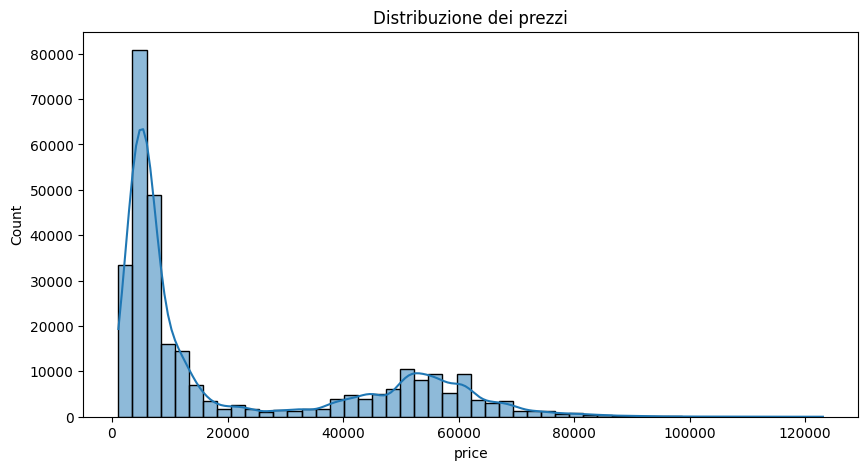

In [ ]:
# 📈 Istogramma per la distribuzione dei prezzi
plt.figure(figsize=(10, 5))
sns.histplot(flight_fare["price"], bins=50, kde=True)
plt.title("Distribuzione dei prezzi")
plt.show()

In [ ]:
# 📊 Calcolo di IQR
Q1 = flight_fare["price"].quantile(0.25)
Q3 = flight_fare["price"].quantile(0.75)
IQR = Q3 - Q1

# Definizione di outlier (valori troppo alti o troppo bassi)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 🧐 Quanti outlier ci sono?
outliers_iqr = flight_fare[(flight_fare["price"] < lower_bound) | (flight_fare["price"] > upper_bound)]
print(f"Numero di outlier (IQR): {len(outliers_iqr)}")

# Percentuale di outlier
print(f"Percentuale di outlier (IQR): {len(outliers_iqr) / len(flight_fare) * 100:.2f}%")

Numero di outlier (IQR): 123
Percentuale di outlier (IQR): 0.04%


In [ ]:
# 📊 Calcolo dello Z-score
flight_fare["zscore"] = zscore(flight_fare["price"])

# 🧐 Identificare outlier con soglia |Z| > 3
outliers_zscore = flight_fare[flight_fare["zscore"].abs() > 3]
print(f"Numero di outlier (Z-score): {len(outliers_zscore)}")

# Percentuale di outlier
print(f"Percentuale di outlier (Z-score): {len(outliers_zscore) / len(flight_fare) * 100:.2f}%")

Numero di outlier (Z-score): 602
Percentuale di outlier (Z-score): 0.20%


In [ ]:
# 📌 Rimozione degli outlier
flight_fare_cleaned = flight_fare[(flight_fare["price"] >= lower_bound) & (flight_fare["price"] <= upper_bound)]

# 📊 Controllo delle dimensioni dopo la pulizia
print(f"Dimensione originale: {flight_fare.shape[0]} righe")
print(f"Dimensione dopo la rimozione degli outlier: {flight_fare_cleaned.shape[0]} righe")

# 📁 Salvare il dataset pulito (opzionale)
flight_fare_cleaned.to_csv("FlightFare_Cleaned.csv")

Dimensione originale: 300153 righe
Dimensione dopo la rimozione degli outlier: 300030 righe


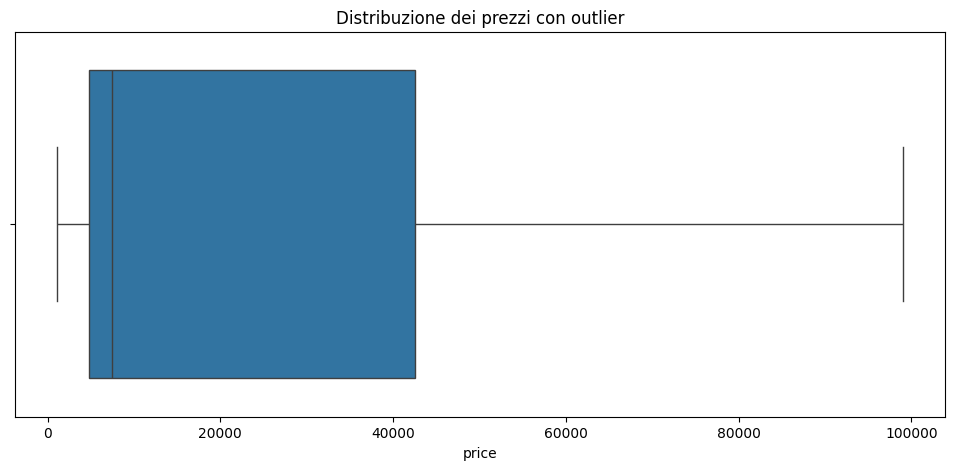

In [ ]:
# 🔍 Identificare outlier con boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x=flight_fare_cleaned["price"])
plt.title("Distribuzione dei prezzi con outlier")
plt.show()

# 📊 Calcolare IQR per la gestione degli outlier
Q1 = flight_fare_cleaned["price"].quantile(0.25)
Q3 = flight_fare_cleaned["price"].quantile(0.75)
IQR = Q3 - Q1

# Definire i limiti per considerare un valore un outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 🧐 Contare gli outlier
outliers = flight_fare_cleaned[(flight_fare_cleaned["price"] < lower_bound) | (flight_fare_cleaned["price"] > upper_bound)]
num_outliers = outliers.shape[0]

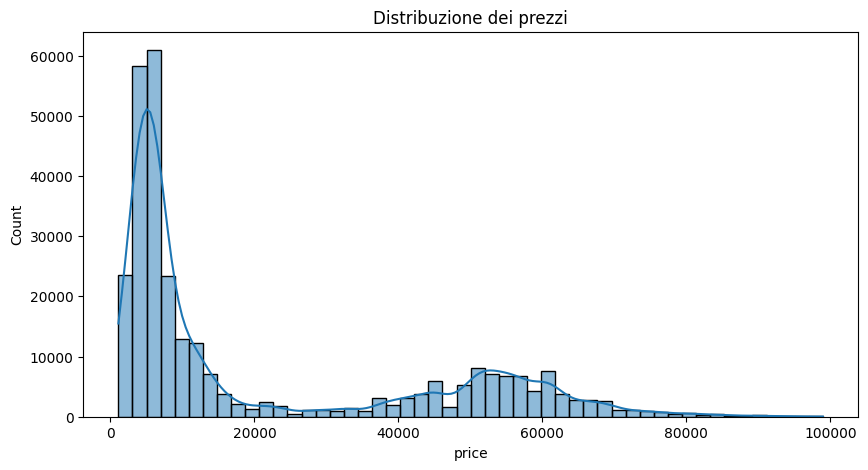

In [ ]:
# 📈 Istogramma per la distribuzione dei prezzi
plt.figure(figsize=(10, 5))
sns.histplot(flight_fare_cleaned["price"], bins=50, kde=True)
plt.title("Distribuzione dei prezzi")
plt.show()

In [ ]:
# prompt: scarica il file flight_fare_cleaned

import pandas as pd
from google.colab import files

# Download the cleaned file
files.download('FlightFare_Cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
flight_fare_cleaned.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,zscore
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,-0.658068
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,-0.658068
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,-0.657936
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,-0.657980
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,-0.657980


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FlightFare_Cleaned.csv to FlightFare_Cleaned.csv


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("FlightFare_Cleaned.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,zscore
0,0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,-0.658068
1,1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,-0.658068
2,2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,-0.657936
3,3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,-0.657980
4,4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,-0.657980


In [ ]:
df= df.drop("Unnamed: 0", axis=1)
df.head()

,Unnamed: 0.1,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,zscore
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,-0.658068
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,-0.658068
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,-0.657936
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,-0.657980
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,-0.657980


In [ ]:
df= df.drop("zscore", axis=1)
df.head()

,Unnamed: 0.1,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df=df.drop("Unnamed: 0.1", axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("airline")  # Escludiamo airline
print("Colonne categoriche da trasformare:", categorical_cols)


Colonne categoriche da trasformare: ['flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
print(df.head())  # Controlla che le colonne siano state trasformate
print(df.shape)  # Verifica che il numero di colonne sia aumentato


    airline  duration  days_left  price  flight_6E-105  flight_6E-113  \
0  SpiceJet      2.17          1   5953          False          False   
1  SpiceJet      2.33          1   5953          False          False   
2   AirAsia      2.17          1   5956          False          False   
3   Vistara      2.25          1   5955          False          False   
4   Vistara      2.33          1   5955          False          False   

   flight_6E-121  flight_6E-123  flight_6E-126  flight_6E-128  ...  \
0          False          False          False          False  ...   
1          False          False          False          False  ...   
2          False          False          False          False  ...   
3          False          False          False          False  ...   
4          False          False          False          False  ...   

   arrival_time_Evening  arrival_time_Late_Night  arrival_time_Morning  \
0                 False                    False                 F

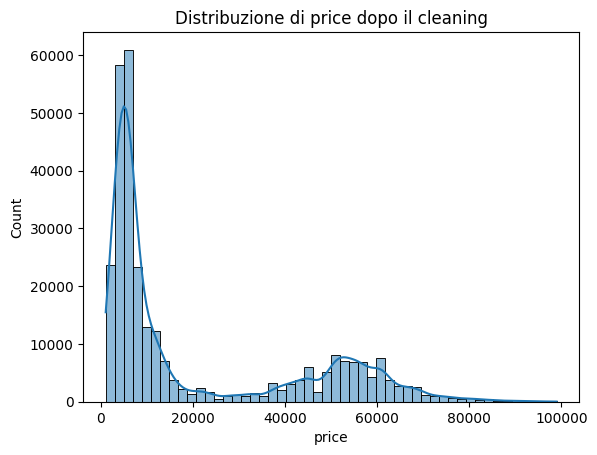

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribuzione di price dopo il cleaning")
plt.show()


In [ ]:
import numpy as np

# Discretizzazione basata su intervalli definiti
df["days_left_bin"] = pd.cut(df["days_left"],
                             bins=[0, 7, 21, 50, 100, np.inf],
                             labels=["0-7", "8-21", "22-50", "51-100", "100+"],
                             include_lowest=True)

# Confronto delle fasce
df["days_left_bin"].value_counts()


,count
days_left_bin,
22-50,180074
8-21,87928
0-7,32028
51-100,0
100+,0


In [ ]:
df.head()

,airline,duration,days_left,price,flight_6E-105,flight_6E-113,flight_6E-121,flight_6E-123,flight_6E-126,flight_6E-128,...,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,days_left_bin
0,SpiceJet,2.17,1,5953,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,0-7
1,SpiceJet,2.33,1,5953,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,0-7
2,AirAsia,2.17,1,5956,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,0-7
3,Vistara,2.25,1,5955,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,0-7
4,Vistara,2.33,1,5955,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,0-7


In [ ]:
df=df.drop("days_left", axis=1)
df.head()

,airline,duration,price,flight_6E-105,flight_6E-113,flight_6E-121,flight_6E-123,flight_6E-126,flight_6E-128,flight_6E-131,...,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,days_left_bin
0,SpiceJet,2.17,5953,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,0-7
1,SpiceJet,2.33,5953,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,0-7
2,AirAsia,2.17,5956,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,0-7
3,Vistara,2.25,5955,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,0-7
4,Vistara,2.33,5955,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,0-7


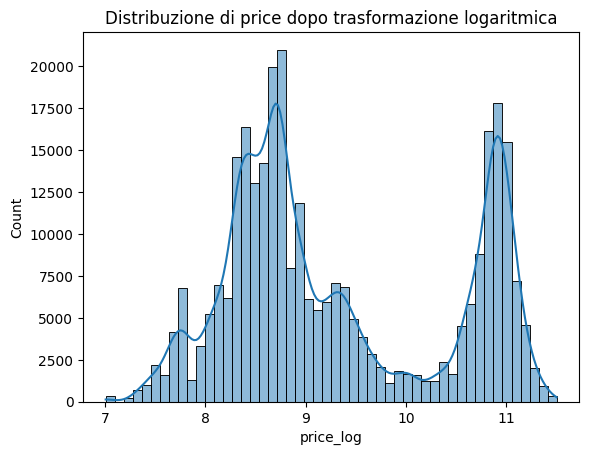

In [ ]:
import numpy as np

# Trasformazione logaritmica su price
df["price_log"] = np.log1p(df["price"])

# Confronto della distribuzione
sns.histplot(df["price_log"], bins=50, kde=True)
plt.title("Distribuzione di price dopo trasformazione logaritmica")
plt.show()


In [ ]:
df.head()

,airline,duration,price,flight_6E-105,flight_6E-113,flight_6E-121,flight_6E-123,flight_6E-126,flight_6E-128,flight_6E-131,...,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,days_left_bin,price_log
0,SpiceJet,2.17,5953,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,0-7,8.691819
1,SpiceJet,2.33,5953,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,0-7,8.691819
2,AirAsia,2.17,5956,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,0-7,8.692322
3,Vistara,2.25,5955,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,0-7,8.692154
4,Vistara,2.33,5955,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,0-7,8.692154


In [ ]:
df=df.drop("price", axis=1)
df.head()

,airline,duration,flight_6E-105,flight_6E-113,flight_6E-121,flight_6E-123,flight_6E-126,flight_6E-128,flight_6E-131,flight_6E-132,...,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,days_left_bin,price_log
0,SpiceJet,2.17,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,0-7,8.691819
1,SpiceJet,2.33,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,0-7,8.691819
2,AirAsia,2.17,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,0-7,8.692322
3,Vistara,2.25,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,0-7,8.692154
4,Vistara,2.33,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,0-7,8.692154


In [ ]:
# prompt: scarica il dataset appena trasformato



# Download the transformed dataset
df.to_csv("FlightFare_Transformed.csv", index=False)
files.download('FlightFare_Transformed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

from google.colab import files
uploaded= files.upload()

Saving FlightFare_Transformed.zip to FlightFare_Transformed.zip


In [ ]:
import zipfile
import os

# Percorso del file zip
zip_path = '/content/FlightFare_Transformed.zip'

# Percorso della directory di destinazione
extract_path = '/content/FlightFare_Transformed'

# Crea la directory di destinazione se non esiste
os.makedirs(extract_path, exist_ok=True)

# Estrai il file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File decompresso con successo!")

File decompresso con successo!


In [ ]:
import os

# Lista dei file nella directory di destinazione
extracted_files = os.listdir(extract_path)
print("File estratti:", extracted_files)

File estratti: ['FlightFare_Transformed.csv']


In [ ]:
import pandas as pd

# Percorso del file CSV estratto
csv_file_path = os.path.join(extract_path, 'FlightFare_Transformed.csv')

# Carica il dataset
df = pd.read_csv(csv_file_path)
print(df.head())

In [ ]:
df.describe()

,duration,price_log
count,300030.000000,300030.000000
mean,12.220126,9.329834
std,7.192515,1.111989
min,0.830000,7.008505
25%,6.830000,8.473032
50%,11.250000,8.912743
75%,16.170000,10.657777
max,49.830000,11.502602


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300030 entries, 0 to 300029
Columns: 1587 entries, airline to price_log
dtypes: bool(1583), float64(2), object(2)
memory usage: 462.1+ MB


In [ ]:
df = pd.get_dummies(df, columns=['airline'], drop_first=True)
df= pd.get_dummies(df, columns=['days_left_bin'], drop_first=True)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['price_future'] = df['price_log'] * (1 + np.random.uniform(-0.1, 0.1, df.shape[0]))


In [ ]:
df['price_decrease'] = np.where(df['price_future'] < df['price_log'], 'YES', 'NO')


In [ ]:
 pd.get_dummies(X, columns=['days_left_bin'], drop_first=True)


,duration,flight_6E-105,flight_6E-113,flight_6E-121,flight_6E-123,flight_6E-126,flight_6E-128,flight_6E-131,flight_6E-132,flight_6E-134,...,class_Economy,price_log,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,price_decrease,days_left_bin_22-50,days_left_bin_8-21
0,2.17,False,False,False,False,False,False,False,False,False,...,True,8.691819,False,False,False,True,False,NO,False,False
1,2.33,False,False,False,False,False,False,False,False,False,...,True,8.691819,False,False,False,True,False,NO,False,False
2,2.17,False,False,False,False,False,False,False,False,False,...,True,8.692322,False,False,False,False,False,NO,False,False
3,2.25,False,False,False,False,False,False,False,False,False,...,True,8.692154,False,False,False,False,True,YES,False,False
4,2.33,False,False,False,False,False,False,False,False,False,...,True,8.692154,False,False,False,False,True,NO,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300025,10.08,False,False,False,False,False,False,False,False,False,...,False,11.145709,False,False,False,False,True,YES,True,False
300026,10.42,False,False,False,False,False,False,False,False,False,...,False,11.252936,False,False,False,False,True,NO,True,False
300027,13.83,False,False,False,False,False,False,False,False,False,...,False,11.278468,False,False,False,False,True,YES,True,False
300028,10.00,False,False,False,False,False,False,False,False,False,...,False,11.309413,False,False,False,False,True,YES,True,False


In [ ]:
df['price_decrease'] = np.where(df['price_future'] < df['price_log'], 1, 0)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['price_future'], axis=1)
y = df['price_future']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestramento del modello di regressione
model = LinearRegression()
model.fit(X_train, y_train)

# Predizione dei prezzi futuri
y_pred = model.predict(X_test)

# Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.07668730718778784
R-squared: 0.9499086434421679
